In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

#### Problem 2.16
Prove that if X $\sim$ Gamma($\alpha$, 1), then $\frac{X}{\lambda}$ $\sim$ Gamma($\alpha$, $\lambda$). 

#### Solution: 
From wikipedia we can read that the cumulative distribution function for Gamma distribution has the following form: <br><br>
F(x; $\alpha$, $\beta$) = $\frac{\gamma(\alpha, x\beta)}{\Gamma(\alpha)}$
in our case $\beta$ is equal to 1, so: <br> 
F(x; $\alpha$, 1) = $\frac{\gamma(\alpha, x)}{\Gamma(\alpha)}$

Now, we can prove this fact as follows: <br>
$F_{\frac{X}{\lambda}}$ = P($\frac{X}{\lambda}$ $\leq$ x) = P(X $\leq$ $\lambda$ x) = $F_{X}$(x$\lambda$) = $\frac{\gamma(\alpha, x\lambda)}{\Gamma(\alpha)}$

#### Comments: 
How to understand the proven fact? <br>

CDF of Gamma($\alpha$, $\beta$) has a nice interpretation. It models the amount of time we need to wait to see at least $\alpha$ events (actually the probability of so). $\beta$ is the rate at which these events occur. So if we divide X by $\lambda$ and for simplicity let's assume that $\lambda \ge 1 $, then we need to wait $\lambda$ times less amount of time. Finally, we can imagine that it is possible by increasing rate of events, and it is basically what we do in this transformation.

In [2]:
x = np.linspace(0, 10, num=1000)

In [3]:
x = np.random.gamma(4, size=10000)

In [4]:
np.mean(x)

4.0110312440083895

In [5]:
np.min(x), np.max(x)

(0.2676861655121498, 15.448077851946014)

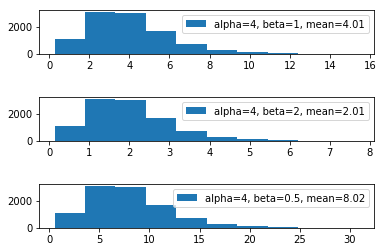

In [6]:
fig, axes = plt.subplots(3, sharex=False, sharey=False)
for i, beta in enumerate([1, 2, 0.5]):
    y = x / beta
    axes[i].hist(y, label='alpha=4, beta={}, mean={}'.format(beta, np.round(np.mean(y), 2)))
    axes[i].legend()
plt.subplots_adjust(hspace=1)

#### Problem 2.20
The pdf of the truncated exponential distribution with parameter $\lambda = 1$ is given by <br><br>
$f(x) = \frac{e^{-x}}{1-e^{-a}}, 0 \leq x \leq a.$
a) Devise and algorithm for generating random variables from this distribution using the inverse-transform method.  
b) Construct a generation algorithm that uses the acceptance-rejection method with an Exp($\lambda$) proposal distribution. 

c)
#### Solution: 
Let's plot this pdf to have a sense what this distribution looks like

In [7]:
def f(x, a):
    return np.exp(-x) / (1 - np.exp(-a))

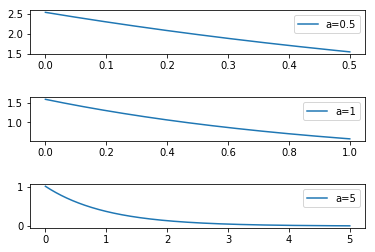

In [8]:
fig, axes = plt.subplots(3, sharex=False, sharey=False)
for i, a in enumerate([0.5, 1, 5]):
    x = np.linspace(0, a, num=1000) # domain is [0, a]
    axes[i].plot(x, f(x, a), label='a={}'.format(a))
    axes[i].legend(), 
plt.subplots_adjust(hspace=1)

#### Solution 
a) 
We can calculate CDF by placing $\int_{0}^{x}$ on pdf. We get
$F(x) = \frac{1 - e^{-x}}{1 - e^{-a}}$. <br> We need $F^{-1}$. <br><br> $F^{-1}(x) = -ln(1 - x(1 - e^{-a}))$

In [9]:
def inverse_cdf(u, a):
    return -np.log(1 - u*(1 - np.exp(-a)))

In [10]:
u = np.random.uniform(0, 1, size=1000)

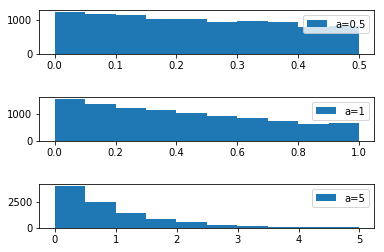

In [11]:
fig, axes = plt.subplots(3, sharex=False, sharey=False)
for i, a in enumerate([0.5, 1, 5]):
    u = np.random.uniform(0, 1, size=10000)
    y = inverse_cdf(u, a)
    axes[i].hist(y, label='a={}'.format(a))
    axes[i].legend(), 
plt.subplots_adjust(hspace=1)

#### Solution 
b) by choosing C equal to $\frac{1}{1 - e^{-a}}$ and $\lambda$ equal to 1 we can write: <br>

$\frac{e^{-x}}{1 - e^{-a}}$ $\leq$ $\frac{1}{1 - e^{-a}} e^{-x}$,
g(x) = $e^{-x}$

In [12]:
a = 5
C = 1 / (1 - np.exp(-a))
# step 1: generate x from g
x = np.random.exponential(1, size=10000)
x = x[x <= a]
n = len(x)
# step 2: generate uniform u 
u = np.random.uniform(0, 1, size=n)
# step 3: if u <= f(x) / (Cg(x)) accept the number
mask = u <= f(x, a) / (C * stats.expon.pdf(x))

In [13]:
np.mean(mask)

1.0

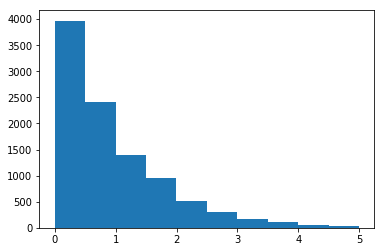

In [14]:
plt.hist(x[mask]);

#### Problem 2.22 
Let the random variable X have pdf: <br>
$f(x) = \frac{1}{2}x, 0 \lt x \lt 1$ and f(x) = $\frac{1}{2}, 1 \le x \le \frac{5}{2}$ 
Generate a random variable from f(x), using <br>
a) the inverse-transform method <br>
b) the acceptance-rejection methid, using the proposal density <br>
$g(x) = \frac{8}{25}x,  0 \le x \le \frac{5}{2}$

In [15]:
def f(x):
    return np.where(
        x < 1,
        0.5 * x,
        0.5
    )

In [16]:
x = np.linspace(0, 5/2, 1000)

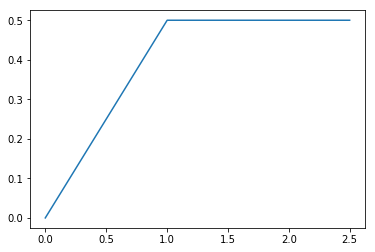

In [17]:
plt.plot(x, f(x));

#### Solution 
a) Taking integrals of pdf we get the following formula for cdf: <br>
$F(x) = \frac{1}{4}x^{2}, 0 \lt x \lt 1$; <br> $F(x) = \frac{1}{2}x - \frac{1}{4}, 1 \le x \le \frac{5}{2}$ <br>
Now we can take inverse of it and get: <br>
$F^{-1}(x) = \sqrt{4x}, 0 \lt x \lt \frac{1}{4}$; <br> $F^{-1}(x)=2x+\frac{1}{2}, \frac{1}{4} \le x \le 1$

In [18]:
def inverse_cdf(x):
    return np.where(x < 0.25, 
                   np.sqrt(4 * x), 
                   2 * x + 0.5)

In [19]:
u = np.random.uniform(0, 1, size=10000)
r = inverse_cdf(u)

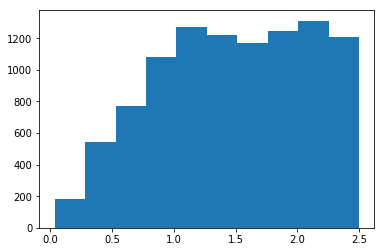

In [20]:
plt.hist(r);

#### Solution 
b) There is not build-in procedure for generating random numbers from linear function, so we will use inverse-transform method to create one. 
The function $g(x) = \frac{8}{25}x$ given in the problem description is valid pdf, whose are under the curve is equal to 1 on the domain [0, 2.5]. 
Its cdf is equal to: <br>
$G(x) = \frac{4}{25}x^{2}, x \in [0, 2.5]; G^{-1}(x) = \frac{5}{2}\sqrt{x}, x \in [0, 1]$ <br>
Let's choose $C = \frac{25}{16}$ to have: <br>
$f(x) \le Cg(x)$

In [21]:
def g(x):
    return 8/25 * x

In [22]:
def random_g(u):
    return 5/2 * np.sqrt(u)

In [23]:
n = 10000
C = 25/16  
# step 1: generate x from g
x = random_g(np.random.uniform(0, 1, size=n))
# step 2: generate uniform u 
u = np.random.uniform(0, 1, size=n) 
# step 3: if u <= f(x) / (Cg(x)) accept the number
mask = u <= f(x) / (C * g(x))

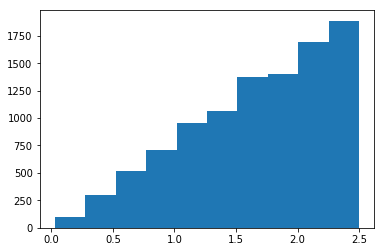

In [24]:
# we can see that xs look really like generated by g
plt.hist(x);

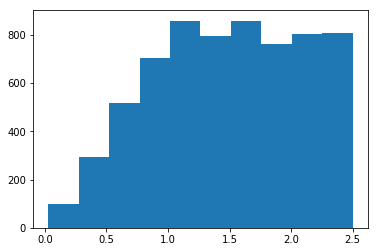

In [25]:
# xs generated by f through the acceptance-rejection method
plt.hist(x[mask]);

In [26]:
np.mean(mask)

0.6501

#### Problem 2.24
Generate a random variable $Y = min_{i=1,..., m}max_{j=1, ..., r}{X_{ij}}$, assuming that the variables $X_{ij}, i=1,.., m, j=1,.., r$ are iid with common cdf F(x), using the inverse-transform method. 

#### Solution
We can imagine that random variables Xs are put in a matrix. So the above operation in plain English: For each row take the maximum values, then from all these values take the minimum. <br><br>
In order to use the invese-transform method we need to construct cdf of $X_{ij}$. Let's denote by $R_{i} = max(X_{i1}, X_{i2}, .., X_{ir})$. Its cdf is $F_{R_{i}}(x) = F(x)^{r}$. And now $F_{X_{ij}}(x) = P(min(R_{1}, R_{2}, .., R_{m}) \le x)$ = P(at least one R is less than x) = 1 - P(no R is less than x) = $1 - (1 - F_{R_{1}}(x))^{m} = 1 - (1 - F(x)^{r})^{m}$. Now it suffices to take the inverse of it and apply standard procedure.  

#### Problem 2.26
Generate a homogenous Poisson process with rate 100 on the interval [0, 1]. Use this to generate a nonhomogenous Poisson process on the same interval, with rate function: <br><br>
$\lambda(t) = 100sin^{2}(10t), t \ge 0$.

#### Solution

In [27]:
t = 0
T = 1
arrivals = []
while t <= T:
    t = t + np.random.exponential(1 / 100)
    if t <= 1:
        arrivals.append(t)

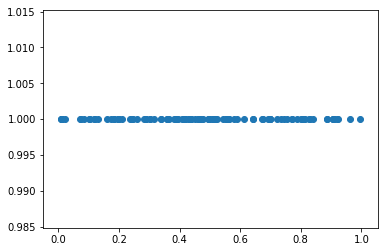

In [28]:
plt.scatter(arrivals, np.ones_like(arrivals));

#### Problem 2.28
Write a program that generates and displays 100 random vectors that are uniformly distributed within the ellipse <br>
$5x^{2} + 21xy + 25y^{2} = 9$

#### Solution
We can write this equation as: <br>
$v^{T}\Sigma v = r^{2}$, where $v = [x, y]^{T}, \Sigma = [[5, 21/2],[21/2, 25]], r = 3$. We can decompose $\Sigma$ as $\Sigma = BB^{T}$, then <br>
$v^{t}\Sigma v = v^{T}BB^{T}v = (B^{T}v)^{T}B^{T}v$.
$y = B^{T}x$ <br>
$y^{T}y = r^{2}$

In [29]:
r = 3
Sigma = np.array([[5, 21/2], [21/2, 25]])
B = np.linalg.cholesky(Sigma)
B_T_inv = np.linalg.inv(B.T) 

In [30]:
np.dot(B, B.T)

array([[ 5. , 10.5],
       [10.5, 25. ]])

In [31]:
# Algorithm 2.5.1
transformed_xs = []
transformed_ys = []
xs = []
ys = []
for i in range(100):
    found = False
    while not found:
        u = np.random.uniform(-r, r, size=2)
        y = np.dot(B.T, u)
        transformed_xs.append(r * y[0] / np.linalg.norm(y))
        transformed_ys.append(r * y[1] / np.linalg.norm(y))
        if np.linalg.norm(y) <= r:
            y = r * y / np.linalg.norm(y)
            v = np.dot(B_T_inv, y)
            xs.append(v[0])
            ys.append(v[1])
            found = True

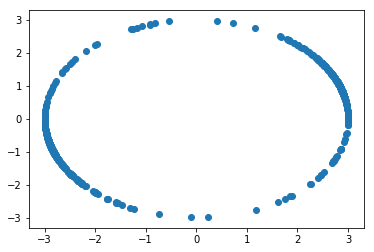

In [32]:
plt.scatter(transformed_xs, transformed_ys);

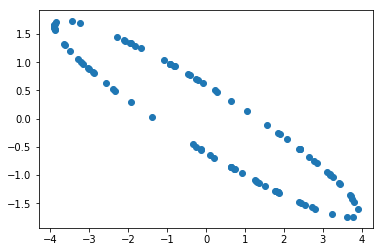

In [33]:
plt.scatter(xs, ys);

#### Problem 2.29
Implement both random permutation algorithms in Section 2.10. Compare their performance

#### Solution

In [34]:
def algorithm1(n, r):
    res = np.zeros((r, n))
    for i in range(r):
        res[i] = np.argsort(np.random.uniform(size=n))
    return res

In [35]:
def algorithm2(n, r):
    res = np.zeros((r, n))
    for i in range(r):
        lst = list(range(n))
        for j in range(n):
            number = np.random.choice(lst)
            res[i, j] = number
            lst.remove(number)
    return res

In [36]:
%%time
r = algorithm1(20, 1000)

CPU times: user 18.8 ms, sys: 2.24 ms, total: 21 ms
Wall time: 18.3 ms


In [37]:
%%time
r = algorithm2(20, 1000)

CPU times: user 122 ms, sys: 225 µs, total: 122 ms
Wall time: 120 ms


#### Problem 2.30
Consider a random walk on the unidirected graph in Figure 2.13. For example, if the random walk at some time is in state 5, it will jump to 3, 4, or 6 at the next transition, each with probability 1/3.

a) Find the one-step transition matrix for this Markov chain. <br>
b) Show that stationary distribution is given by $\pi = (\frac{1}{9}, \frac{1}{6}, \frac{2}{9}, \frac{2}{9}, \frac{1}{6}, \frac{1}{9})$ <br>
c) Simulate the random walk on a computer and verify that in the long run, proportion of visits to the various nodes is in accordance with the stationary distribution. 

#### Solution

In [38]:
P = np.array([
    [0, 1/2, 1/2, 0, 0, 0],
    [1/3, 0, 1/3, 1/3, 0, 0],
    [1/4, 1/4, 0, 1/4, 1/4, 0],
    [0, 1/4, 1/4, 0, 1/4, 1/4],
    [0, 0, 1/3, 1/3, 0, 1/3],
    [0, 0, 0, 1/2, 1/2, 0]
])

In [39]:
P

array([[0.        , 0.5       , 0.5       , 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.33333333, 0.33333333, 0.        ,
        0.        ],
       [0.25      , 0.25      , 0.        , 0.25      , 0.25      ,
        0.        ],
       [0.        , 0.25      , 0.25      , 0.        , 0.25      ,
        0.25      ],
       [0.        , 0.        , 0.33333333, 0.33333333, 0.        ,
        0.33333333],
       [0.        , 0.        , 0.        , 0.5       , 0.5       ,
        0.        ]])

$\pi = \pi P$ can be also written as $\pi^{T} = P^{T}\pi^{T}$

In [40]:
w, v = np.linalg.eig(P.T)

In [41]:
w

array([ 1.        ,  0.5       , -0.61435678, -0.5       , -0.25      ,
       -0.13564322])

In [42]:
v[:, 0]

array([0.26261287, 0.3939193 , 0.52522573, 0.52522573, 0.3939193 ,
       0.26261287])

In [43]:
v[:, 0] / v[:, 0].sum()

array([0.11111111, 0.16666667, 0.22222222, 0.22222222, 0.16666667,
       0.11111111])

In [44]:
stationary_pi = [1/9, 1/6, 2/9, 2/9, 1/6, 1/9]

In [45]:
stationary_pi

[0.1111111111111111,
 0.16666666666666666,
 0.2222222222222222,
 0.2222222222222222,
 0.16666666666666666,
 0.1111111111111111]

In [46]:
def simulate(P, N):
    states = []
    states.append(np.random.choice(6))
    
    for i in range(N):
        pi = P[states[-1]]
        states.append(np.random.choice(6, p=pi))
    
    return states

In [47]:
states = simulate(P, 10000)

In [48]:
burn_out = [0, 100, 1000, 5000]
for b in burn_out:
    print((pd.Series(states[b:]).value_counts().loc[[0, 1, 2, 3, 4, 5]]
          / len(states[b:])).values)
    print()

[0.10988901 0.16568343 0.22327767 0.2229777  0.16628337 0.11188881]

[0.10968589 0.16553883 0.22280578 0.22300778 0.16644783 0.11251389]

[0.107988   0.16442617 0.22297522 0.22319742 0.16731474 0.11409843]

[0.10717856 0.16356729 0.22255549 0.22395521 0.16796641 0.11477704]



In [49]:
np.array(stationary_pi)

array([0.11111111, 0.16666667, 0.22222222, 0.22222222, 0.16666667,
       0.11111111])

#### Problem 2.31
Generate various sample paths for tthe random walk on the integers for p=1/2 and p=2/3

#### Solution

In [50]:
def random_walk(N, p):
    state = 0
    states = [state]
    for i in range(N-1):
        states.append(states[-1] + np.random.choice([-1, 1], p=[1-p, p]))
    return states

In [51]:
path1 = random_walk(100, 0.5)
path2 = random_walk(100, 0.5)
path3 = random_walk(100, 0.5)

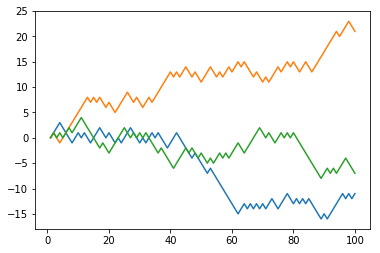

In [52]:
plt.plot(np.arange(1, 101), path1)
plt.plot(np.arange(1, 101), path2)
plt.plot(np.arange(1, 101), path3);

In [53]:
path1 = random_walk(100, 2/3)
path2 = random_walk(100, 2/3)
path3 = random_walk(100, 2/3)

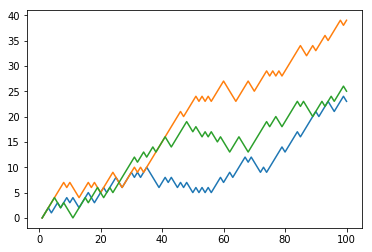

In [54]:
plt.plot(np.arange(1, 101), path1)
plt.plot(np.arange(1, 101), path2)
plt.plot(np.arange(1, 101), path3);

#### Problem 2.32
Consider the M/M/1 queueing system of example 1.13. Let $X_{t}$ be the number of customers in the system at time t. Write a computer program to simulate the stochastic process X = {$X_{t}$} as a Markov jump process, and applying Algorithm 2.7.2. Present sample paths of the process for the cases $\lambda = 1$, $\mu = 2$ and $\lambda = 10$, $\mu = 11$.

#### Solution

In [55]:
def sample_path(T, lambda_, mu_):
    times = [0]
    states = [0]
    while times[-1] < T:
        # no one in the system -> arrival
        if states[-1] == 0:
            times.append(times[-1] + np.random.exponential(1/lambda_))
            states.append(1)
        else:
            # arrival
            if np.random.uniform() < lambda_ / (lambda_ + mu_):
                times.append(times[-1] + np.random.exponential(1/lambda_))
                states.append(states[-1] + 1)
            else:
                times.append(times[-1] + np.random.exponential(1/mu_))
                states.append(states[-1] - 1)
    return times, states

In [56]:
times1, states1 = sample_path(100, 1, 2)

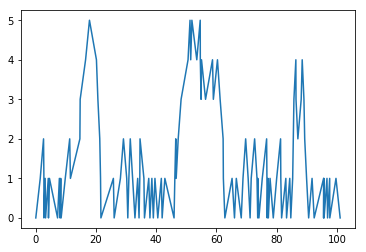

In [57]:
plt.plot(times1, states1)

In [58]:
times2, states2 = sample_path(100, 10, 11)

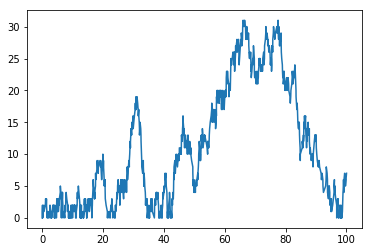

In [59]:
plt.plot(times2, states2)

In [60]:
times3, states3 = sample_path(100, 10.99, 11)

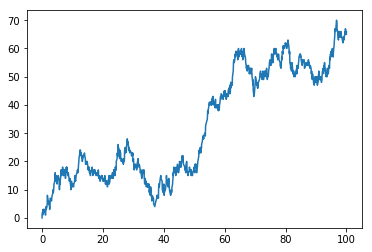

In [61]:
plt.plot(times3, states3)

#### Basics of simpy

In [62]:
import simpy

In [63]:
# example
def g(env, t):
    yield env.timeout(t)
    print('t={}'.format(env.now))
    
def f(env):
    yield env.process(g(env, 1)) 
    yield env.process(g(env, 1.1))
    yield env.process(g(env, 1.2))
    yield env.process(g(env, 1.3))
    
def h(env):
    yield env.process(g(env, 1)) & env.process(g(env, 1.1)) & env.process(g(env, 1.2)) & env.process(g(env, 1.3)) 

In [64]:
env = simpy.Environment()
env.process(f(env));
env.run()

t=1
t=2.1
t=3.3
t=4.6


In [65]:
env = simpy.Environment()
env.process(h(env));
env.run()

t=1
t=1.1
t=1.2
t=1.3
